Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               67584     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 12, 128)          0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_7 (Dropout)         (None, 12, 128)           0         
                                                                 
 time_distributed_3 (TimeDis  (None, 12, 3)            387       
 tributed)                                            

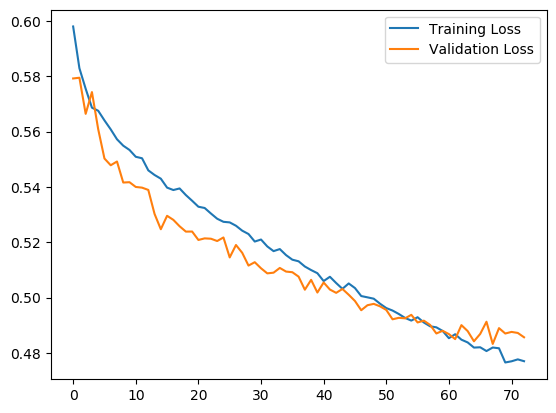

19/19 [==============================] - 1s 6ms/step


INFO:tensorflow:Assets written to: /root/CodeCommit/trained_models/pod_autoencoder/assets


INFO:tensorflow:Assets written to: /root/CodeCommit/trained_models/pod_autoencoder/assets


In [26]:
import numpy as np
from models import autoencoder_model_dish_5g 
#from training_data_builder import pod_training_data_builder

def pod_autoencoder_training(pod_training_tensor, model_path = '/root/CodeCommit/trained_models/pod_autoencoder'):
    
    #Initialize autoencoder model
    pod_autoencoder = autoencoder_model_dish_5g()
    
    #Train model
    pod_autoencoder.train(pod_training_tensor)
    
    #Save model
    pod_autoencoder.save_nn(model_path)
        
    return pod_autoencoder
    


if __name__ == "__main__":
    #build training data
    #pod_training_data, pod_training_tensor, pod_testing_data, pod_testing_tensor = pod_training_model_builder()
    pod_training_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor.txt').reshape(600,12,3)
    #pod_testing_tensor = np.loadtxt('/home/sagemaker-user/CodeCommit/data/pod_training_tensor_2.txt').reshape(600,12,3)
    
    pod_autoencoder_training(pod_training_tensor)

In [27]:
import numpy as np
import tensorflow as tf

def pod_autoencoder_inference(pod_testing_tensor, model_path = '/root/CodeCommit/trained_models/pod_autoencoder'):
    
    #Load trained model
    pod_autoencoder = tf.keras.models.load_model(model_path)
    
    #Make predictions
    predictions = pod_autoencoder.predict(pod_testing_tensor)
    
    residuals = np.abs(predictions - pod_testing_tensor)
    
    return predictions, residuals


if __name__ == "__main__":
    
    #read raw data
    
    #proprocess
    
    #feature enginering
    
    
    #build training data
    #pod_training_data, pod_training_tensor, pod_testing_data, pod_testing_tensor = pod_training_model_builder()
    #pod_training_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor.txt').reshape(600,12,3)
    pod_testing_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor_2.txt').reshape(600,12,3)
    
    predictions, residuals = pod_autoencoder_inference(pod_testing_tensor)

19/19 [==============================] - 1s 6ms/step


In [29]:
import numpy as np
from models import autoencoder_model_dish_5g 

def pod_autoencoder_testing(pod_testing_tensor, model_path = '/root/CodeCommit/trained_models/pod_autoencoder'):
    
    #Load trained model
    pod_autoencoder = tf.keras.models.load_model(model_path)
    
    #Make predictions
    test_predictions = pod_autoencoder.predict(pod_testing_tensor)
    
    #Calculate residuals for testing data == anomaly score
    test_residuals = np.abs(test_predictions - pod_testing_tensor)
    
    return test_predictions, test_residuals
    


if __name__ == "__main__":
    #load testing data
    pod_testing_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor_2.txt').reshape(600,12,3)
    
    test_predictions, test_residuals = pod_autoencoder_testing(pod_testing_tensor)
    
    #save test_predictions and test_residuals in parquette format

19/19 [==============================] - 1s 6ms/step


In [30]:
test_predictions

array([[[ 0.25109133, -0.3581529 , -0.01339692],
        [-0.05575236, -0.8694    , -0.19364995],
        [-0.23763101, -1.1830682 , -0.2894061 ],
        ...,
        [ 0.45466396, -0.71222746,  0.9319619 ],
        [ 0.333866  , -1.0217396 ,  0.55061215],
        [-0.19005638, -1.1183121 ,  0.01487108]],

       [[-0.5246013 , -1.0925115 , -0.5029159 ],
        [-0.68307966, -1.1705786 , -0.65248615],
        [-0.6484153 , -0.95060134, -0.6504639 ],
        ...,
        [-0.6184027 ,  0.98294806, -0.6227449 ],
        [-0.9432496 ,  1.1696959 , -0.4067581 ],
        [-1.0689279 ,  1.3337624 ,  0.02852922]],

       [[ 0.05918286, -0.12618966, -0.39808384],
        [ 0.11364843, -0.3928315 , -0.51904404],
        [ 0.19062527, -0.5358373 , -0.5013777 ],
        ...,
        [-0.19272912, -0.36613587, -0.3788592 ],
        [-0.34659332, -0.7501596 , -0.32715836],
        [-0.40981057, -0.7631576 , -0.06220742]],

       ...,

       [[ 0.3035215 , -0.04272306, -0.27769306],
        [ 0

In [5]:
cd eks_ml_pipeline/

/root/CodeCommit/eks-ml-pipeline/eks_ml_pipeline


In [6]:
import numpy as np
from models import autoencoder_model_dish_5g 
#from training_data_builder import pod_training_data_builder

In [9]:
pod_training_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor.txt').reshape(600,12,3)
pod_testing_tensor = np.loadtxt('/root/CodeCommit/data/pod_training_tensor_2.txt').reshape(600,12,3)

In [10]:
autoencoder = autoencoder_model_dish_5g()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 12, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 12, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 12, 3)            387       
 ibuted)                                                

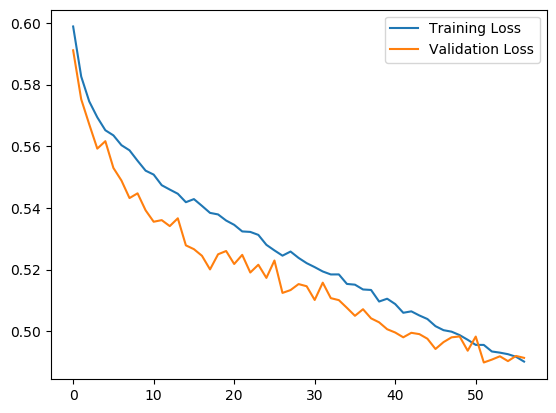

19/19 [==============================] - 1s 6ms/step


In [11]:
autoencoder.train(pod_training_tensor)

In [12]:
autoencoder.save_nn('trained_models/pod_autoencoder')

INFO:tensorflow:Assets written to: pod_autoencoder/assets


INFO:tensorflow:Assets written to: pod_autoencoder/assets


In [13]:
# autoencoder.test(pod_testing_tensor)

19/19 [==============================] - 0s 6ms/step


(array([[[ 1.14549007e-02, -4.13196236e-01, -1.61605805e-01],
         [-1.92153886e-01, -8.32879543e-01, -3.04403186e-01],
         [-3.52341264e-01, -1.10417211e+00, -3.81925076e-01],
         ...,
         [ 3.39480013e-01, -5.17572880e-01,  5.20398915e-01],
         [ 1.17878579e-01, -5.93779445e-01,  4.21976209e-01],
         [-3.79640639e-01, -8.80163431e-01,  1.15249030e-01]],
 
        [[-5.17509043e-01, -1.01875663e+00, -4.30968851e-01],
         [-5.78027606e-01, -1.04509461e+00, -5.34188330e-01],
         [-5.15262961e-01, -8.12320709e-01, -5.02644658e-01],
         ...,
         [-3.65438133e-01,  7.42497683e-01, -6.08396411e-01],
         [-3.23502779e-01,  8.30792546e-01, -5.38976789e-01],
         [-3.70254308e-01,  9.57813501e-01, -2.86133111e-01]],
 
        [[ 9.71212909e-02, -2.98037499e-01, -3.94618213e-01],
         [ 2.46417522e-01, -4.31347728e-01, -4.63317752e-01],
         [ 3.28465462e-01, -4.38438237e-01, -4.15131122e-01],
         ...,
         [-8.55469257e

In [4]:
pwd

'/root/CodeCommit/eks-ml-pipeline'

In [5]:
pip install -r/root/CodeCommit/eks-ml-pipeline/requirements.txt

Keyring is skipped due to an exception: 'keyring.backends'
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install /root/CodeCommit/msspackages/dist/msspackages-0.0.7-py3-none-any.whl

Keyring is skipped due to an exception: 'keyring.backends'
Processing /root/CodeCommit/msspackages/dist/msspackages-0.0.7-py3-none-any.whl
  Using cached pyspark-3.3.1-py2.py3-none-any.whl
  Using cached configparser-5.3.0-py3-none-any.whl (19 kB)
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)


In [5]:
from msspackages import setup_runner
setup_runner()

b"Get:1 http://deb.debian.org/debian buster InRelease [122 kB]\nGet:2 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]\nGet:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]\nGet:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [411 kB]\nGet:5 http://deb.debian.org/debian buster/main amd64 Packages [7909 kB]\nGet:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8788 B]\nFetched 8542 kB in 1s (6205 kB/s)\nReading package lists...\nBuilding dependency tree...\nReading state information...\n62 packages can be upgraded. Run 'apt list --upgradable' to see them.\nReading package lists...\nBuilding dependency tree...\nReading state information...\nThe following NEW packages will be installed:\n  sudo\n0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.\nNeed to get 1244 kB of archives.\nAfter this operation, 3883 kB of additional disk space will be used.\nGet:1 http://security.debian.org/

In [6]:
!python3 -m pip install -r requirements.txt

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached grpcio-1.51.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached protobuf-3.19.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB

In [2]:
%%time
from eks_ml_pipeline import pod_autoencoder_ad_preprocessing, pod_autoencoder_ad_feature_engineering, pod_autoencoder_train_test_split

#pre processing
pod_features_data, pod_processed_data = pod_autoencoder_ad_preprocessing("pod_autoencoder_ad","11-30-2022","2022","10","10","10","128gb")


CPU times: user 3.39 s, sys: 2.33 s, total: 5.72 s
Wall time: 13.3 s


In [3]:
pod_features_data

,feature_name,feature_description,feature_datatype,feature_type,feature_group_name,feature_group_description,model_type,problem_type,created_by,created_date,model_parameters
0,pod_cpu_utilization,The percentage of CPU cores utilized on a per ...,float,existing,pod_autoencoder_ad,general features to track the infrastructure u...,autoencoder,anomaly detection,"Madhu, Evgeniya",11-30-2022,"{'time_steps': 12, 'batch_size': 6, 'sample_mu..."
1,pod_memory_utilization,The percentage of memory currently being used ...,float,existing,pod_autoencoder_ad,general features to track the infrastructure u...,autoencoder,anomaly detection,"Madhu, Evgeniya",11-30-2022,"{'time_steps': 12, 'batch_size': 6, 'sample_mu..."
2,pod_network_total_bytes,The amount of all network recreived and transf...,float,existing,pod_autoencoder_ad,general features to track the infrastructure u...,autoencoder,anomaly detection,"Madhu, Evgeniya",11-30-2022,"{'time_steps': 12, 'batch_size': 6, 'sample_mu..."


In [4]:
#test, train split
pod_train_data, pod_test_data = pod_autoencoder_train_test_split(pod_processed_data)

In [5]:
%%time
#Train data feature engineering: calculations were performed on 32 vCPU + 128 GiB, it took 25 min to buil 600 samples dataset
pod_training_data, pod_training_tensor = pod_autoencoder_ad_feature_engineering(pod_features_data, pod_train_data)

Finished with sample #0
Finished with sample #1
Finished with sample #2
Finished with sample #3
Finished with sample #4
Finished with sample #5
Finished with sample #6
Finished with sample #7
Exception occurred due to shape mismatch: len(pod_tensor_list) = 11, time_steps = 12
Finished with sample #8
Finished with sample #9
Finished with sample #10
Finished with sample #11
Finished with sample #12
Finished with sample #13
Finished with sample #14
Finished with sample #15
Finished with sample #16
Finished with sample #17
Finished with sample #18
Finished with sample #19
Finished with sample #20
Finished with sample #21
Exception occurred due to shape mismatch: len(pod_tensor_list) = 11, time_steps = 12
Finished with sample #22
Finished with sample #23
Finished with sample #24
Finished with sample #25
Finished with sample #26
Finished with sample #27
Finished with sample #28
Finished with sample #29
Finished with sample #30
Finished with sample #31
Finished with sample #32
Finished with s

In [6]:
#save tensor pod data
import numpy as np
np.savetxt('pod_training_tensor.txt', pod_training_tensor.reshape(pod_training_tensor.shape[0], -1))

In [ ]:
%%time
from eks_ml_pipeline import node_autoencoder_ad_preprocessing, node_autoencoder_ad_feature_engineering, node_autoencoder_train_test_split

#pre processing
node_features_data, node_processed_data = node_autoencoder_ad_preprocessing("node_autoencoder_ad","11-21-2022","2022","10","10","10","128gb")

#test, train split
node_train_data, pod_test_data = node_autoencoder_train_test_split(node_processed_data)

#Train data feature engineering: calculations were performed on 32 vCPU + 128 GiB, it took 25 min to buil 600 samples dataset
node_training_data, node_training_tensor = node_autoencoder_ad_feature_engineering(node_features_data, node_train_data)

Finished with sample #0
Finished with sample #1
Finished with sample #2
Finished with sample #3
Finished with sample #4
Finished with sample #5
Finished with sample #6
Finished with sample #7
Finished with sample #8
Finished with sample #9
Finished with sample #10
Finished with sample #11
Finished with sample #12
Finished with sample #13
Finished with sample #14
Finished with sample #15
Finished with sample #16
Finished with sample #17
Finished with sample #18
Finished with sample #19
Finished with sample #20
Finished with sample #21
Finished with sample #22
Finished with sample #23
Finished with sample #24
Finished with sample #25
Finished with sample #26
Finished with sample #27
Finished with sample #28
Finished with sample #29
Finished with sample #30
Finished with sample #31
Finished with sample #32
Finished with sample #33
Finished with sample #34
Finished with sample #35
Finished with sample #36
Finished with sample #37
Finished with sample #38
Finished with sample #39
Finished w

In [ ]:
%%time
from eks_ml_pipeline import container_autoencoder_ad_preprocessing, container_autoencoder_ad_feature_engineering, container_autoencoder_train_test_split

#pre processing
container_features_data, container_processed_data = container_autoencoder_ad_preprocessing("container_autoencoder_ad","11-21-2022","2022","10","10","10","128gb")

#test, train split
container_train_data, container_test_data = container_autoencoder_train_test_split(container_processed_data)

#Train data feature engineering: calculations were performed on 32 vCPU + 128 GiB, it took 25 min to buil 600 samples dataset
container_training_data, container_training_tensor = container_autoencoder_ad_feature_engineering(container_features_data, container_train_data)

Finished with sample #0
Finished with sample #1
Finished with sample #2
Finished with sample #3
Finished with sample #4
Finished with sample #5
Finished with sample #6
Finished with sample #7
Finished with sample #8
Finished with sample #9
Finished with sample #10
Finished with sample #11
Finished with sample #12
Finished with sample #13
Finished with sample #14
Finished with sample #15
Finished with sample #16
Finished with sample #17
Finished with sample #18
Finished with sample #19
Finished with sample #20
Finished with sample #21
Finished with sample #22
Finished with sample #23
Finished with sample #24
Finished with sample #25
Finished with sample #26
Finished with sample #27
Finished with sample #28
Finished with sample #29
Finished with sample #30
Finished with sample #31
Finished with sample #32
Finished with sample #33
Exception occurred due to shape mismatch: len(node_tensor_list) = 11, time_steps = 12
Finished with sample #34
Finished with sample #35
Finished with sample #36

In [ ]:
#read data from S3 bucket:
data_ingestion = Pyspark_data_ingestion()
spark = data_ingestion.get_spark()
pod_test_df = spark.read.parquet('s3a://emr-serverless-output-pd/aa/test_data1/')

In [13]:
%%time
from eks_ml_pipeline import node_autoencoder_ad_preprocessing, node_autoencoder_ad_feature_engineering, node_autoencoder_train_test_split

#pre processing
node_features_data, node_processed_data = node_autoencoder_ad_preprocessing("node_autoencoder_ad","11-21-2022","2022","10","10","10","128gb")



CPU times: user 53.6 ms, sys: 21.2 ms, total: 74.8 ms
Wall time: 12.4 s


In [ ]:
#test, train split
node_train_data, node_test_data = node_autoencoder_train_test_split(node_processed_data)

#Train data feature engineering
node_training_data, node_training_tensor = node_autoencoder_ad_feature_engineering(node_features_data, node_train_data)
print(node_training_data.show(truncate=False))
print(node_training_tensor.shape)

#Test data feature engineering
# node_testing_data, node_testing_tensor = node_autoencoder_ad_feature_engineering(node_features_data, node_test_data)
# print(node_testing_data.show(truncate=False))
# print(node_testing_tensor.shape)

i-0c4195b737f3ea65b
i-0c16de54e70456edb
i-0f7c2847250d4bf17
i-00f549b1977d71421
i-069f59f3cb835a468
i-089b266ea703b601b
i-083a68dd2c550b41f
i-016563cb8309a7094
i-051fd5738fb2c6ea1
i-0196f89befc2119b0
i-0b4e5a0f008c8710b
i-0e38bd7b4f6afd740
i-055d3b9ea035c9f49
i-0d8a08d4c37a89dd4
i-07e26d88fc0415c88
i-0c0f5401459e929d9
i-0613bdb45fb9738a8
i-049a23e425880667d
i-04a10e30a5989d602
i-0cbb588697c71c996
i-05e69fda46bdcc13c
i-005233f00f907ec3e
i-0bcd4ea3fc9cd87a7
i-016e870187fd08282
i-0ea37c2a5d64f001e
i-0d5cd6af4b8d70bcc
i-0b9a635fd77e60086
i-05f48056e7c8cc2f8
i-0b06d7929734611d0
i-02ffb539acc0cbf94
i-0c19364198e2ed5d1
i-0b4e5a0f008c8710b
i-0c63afd423cb8fa97
i-09e89aaa35264cd47
i-03257ddb394441bbc
i-0f72b3214815c581e
i-089b266ea703b601b
i-06d98ce4e70468c94
i-0786482c940838bec
i-08b01870c71691ba3
i-0a0a7354e7757e1e8
i-03fa1ba38efb4c9c2
i-08a4ed5bf3f1e2238
i-00f549b1977d71421
i-03a03e9e832962ba5
i-0d5795fd58c96e20d
i-0ee5ad2215c7ca388
i-0e3bca18935c2e996
i-0e7832552c9f31487
i-00f549b1977d71421


In [ ]:
%%time
from eks_ml_pipeline import container_autoencoder_ad_preprocessing, container_autoencoder_ad_feature_engineering, container_autoencoder_train_test_split

#pre processing
container_features_data, container_processed_data = container_autoencoder_ad_preprocessing("container_autoencoder_ad","11-21-2022","2022","10","10","10","128gb")

#test, train split
container_train_data, container_test_data = container_autoencoder_train_test_split(container_processed_data)

#Train data feature engineering
container_training_data, container_training_tensor = container_autoencoder_ad_feature_engineering(container_features_data, container_train_data)
print(container_training_data.show(truncate=False))
print(container_training_tensor.shape)

#Test data feature engineering
# container_testing_data, container_testing_tensor = container_autoencoder_ad_feature_engineering(container_features_data, container_test_data)
# print(node_testing_data.show(truncate=False))
# print(container_testing_tensor.shape)

In [ ]:
#generalize functions for all reg types

def training_data_builder(preprocessing_args,
                          preprocessing_fnc, 
                          preprocessing_train_test_split_fnc,
                          feature_engineering_fnc):
    
    #pre processing
    features_data, processed_data = preprocessing_fnc(*preprocessing_args)
    #pd.set_option('display.max_columns', None)  
    print(features_data.head())
    print(processed_data.show(truncate=False))
    
    #test, train split
    train_data, test_data = preprocessing_train_test_split_fnc(processed_data)

    #Train data feature engineering
    training_data = feature_engineering_fnc(features_data, train_data)
    #s3_operations.write_to_s3(node_training_data, s3_path)
    print(training_data.show(truncate=False))
 
    #Test data feature engineering
    testing_data = feature_engineering_fnc(features_data, test_data)
    #s3_operations.write_to_s3(node_testing_data, s3_path)
    print(testing_data.show(truncate=False))
    
    return training_data, testing_data

def pod_training_data_builder():
    
    #pre processing
    pod_features_data, pod_processed_data = pod_autoencoder_ad_preprocessing("pod_autoencoder_ad","11-30-2022","2022","10","10","10")
    #pd.set_option('display.max_columns', None)  
    print(pod_features_data.head())
    print(pod_processed_data.show(truncate=False))
    
    #test, train split
    pod_train_data, pod_test_data = pod_autoencoder_train_test_split(pod_processed_data)

    #Train data feature engineering
    pod_training_data = pod_autoencoder_ad_feature_engineering(pod_features_data, pod_train_data)
    #s3_operations.write_to_s3(node_training_data, s3_path)
    print(pod_training_data.show(truncate=False))
 
    #Test data feature engineering
    pod_testing_data = pod_autoencoder_ad_feature_engineering(pod_features_data, pod_test_data)
    #s3_operations.write_to_s3(node_testing_data, s3_path)
    print(pod_testing_data.show(truncate=False))
    
    return pod_training_data, pod_testing_data

#build training data for pod
pod_training_data, pod_testing_data =training_data_builder(preprocessing_args = ["pod_autoencoder_ad","11-30-2022","2022","10","10","10"],
                                                           preprocessing_fnc = autoencoder_ad_preprocessing, 
                                                           preprocessing_train_test_split_fnc = pod_autoencoder_train_test_split,
                                                           feature_engineering_fnc = pod_autoencoder_ad_feature_engineering)